In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

folder_path = 'https://drive.google.com/drive/folders/14zFcDWPkxptydjRoK9vz5iATYtlzVjBm?usp=drive_link'

Mounted at /content/drive


# Creating Labels

In [3]:
directory = "/content/drive/MyDrive/Pokemon_Classification_w1830176/PokemonData"
labels = os.listdir(directory)
nb = len(labels)
print(labels)

['Arcanine', 'Alakazam', 'Blastoise', 'Bellsprout', 'Arbok', 'Articuno', 'Abra', 'Aerodactyl', 'Beedrill', 'Alolan Sandslash', 'Chansey', 'Cloyster', 'Charmander', 'Clefairy', 'Bulbasaur', 'Caterpie', 'Butterfree', 'Clefable', 'Charmeleon', 'Charizard', 'Dragonair', 'Doduo', 'Dragonite', 'Ditto', 'Cubone', 'Drowzee', 'Dratini', 'Dodrio', 'Diglett', 'Dewgong', 'Fearow', 'Dugtrio', 'Flareon', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Farfetchd', 'Eevee', 'Exeggutor', 'Golbat', 'Geodude', 'Golem', 'Golduck', 'Graveler', 'Gengar', 'Goldeen', 'Gastly', 'Grimer', 'Gloom', 'Horsea', 'Gyarados', 'Haunter', 'Hypno', 'Hitmonlee', 'Ivysaur', 'Jigglypuff', 'Hitmonchan', 'Growlithe', 'Jolteon', 'Kakuna', 'Koffing', 'Lapras', 'Kingler', 'Kabutops', 'Jynx', 'Kabuto', 'Krabby', 'Kangaskhan', 'Kadabra', 'Machoke', 'Magmar', 'Mankey', 'Machamp', 'Lickitung', 'Marowak', 'Magneton', 'Magikarp', 'Magnemite', 'Machop', 'Nidoqueen', 'Muk', 'Mew', 'Nidoking', 'Moltres', 'Mewtwo', 'Nidorina', 'MrMime',

In [4]:
print(nb)

150


In [ ]:
import random
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

# Converting images to Numpy arrays

In [6]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):

#             print(os.path.join(folder,image))
            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X),np.array(y)

In [7]:
X, y = input_target_split(directory,labels)

Completed: Wartortle

In [8]:
len(stored)

150

# Visualizing the images and their True labels

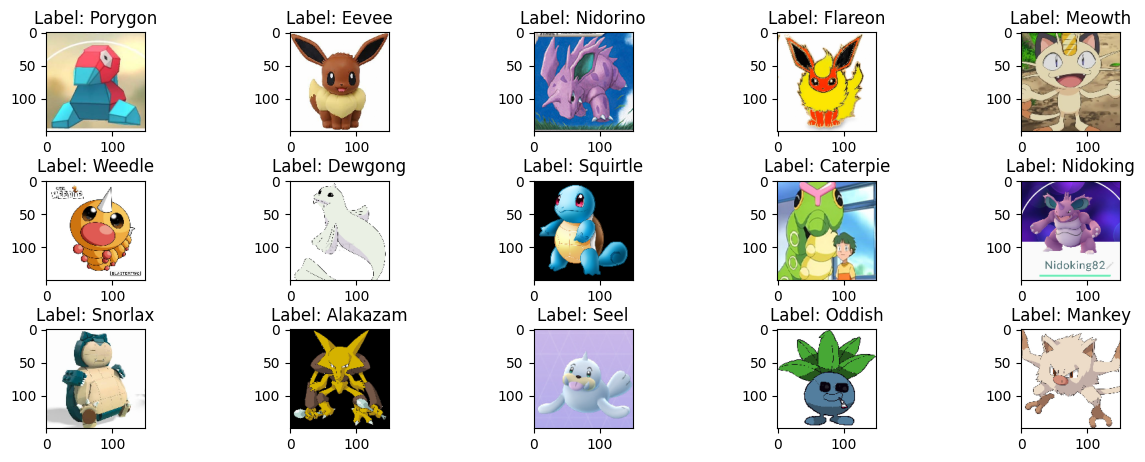

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [10]:
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

# Train Test Split and encoding of labels

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([28, 22, 36, 32, 41, 33, 30, 29, 25, 32, 35, 35, 38, 31, 33, 26, 21,
       27, 34, 25, 32, 30, 38, 33, 31, 34, 19, 32, 31, 31, 39, 37, 39, 32,
       30, 40

In [12]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [13]:
y_train = np.eye(nb)[y_train]
y_test = np.eye(nb)[y_test]

# Freezing the DenseNet201 model upto layer 675

In [14]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import tensorflow as tf

img_size = 150
base_model = DenseNet201(include_top=False,
                         weights='imagenet',
                         input_shape=(img_size, img_size, 3))

for layer in base_model.layers[:675]:
    layer.trainable = False

for layer in base_model.layers[675:]:
    layer.trainable = True

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(nb, activation=tf.nn.softmax))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


74836368/74836368 [==============================] - 1s 0us/step


# Feedforward network for classifying 150 pokemon

In [15]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(nb, activation=tf.nn.softmax))
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

# Early stopping conditions in case model accuracy does not improve

In [16]:
filepath= "model_pokemon.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.00001)

callbacks_list = [
        checkpoint,
        early_stopping,
        learning_rate_reduction
    ]

In [17]:
hist = model.fit_generator(datagen.flow(X_train,y_train,batch_size=32),
                                        validation_data=testgen.flow(X_test,y_test,batch_size=32),
                                        epochs=10,
                                        callbacks=callbacks_list)

<ipython-input-17-f4ed62ad232e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train,y_train,batch_size=32),


Epoch 1/10
167/167 [==============================] - ETA: 0s - loss: 3.1144 - accuracy: 0.3720
Epoch 00001: val_accuracy improved from -inf to 0.71609, saving model to model_pokemon.h5
167/167 [==============================] - 884s 5s/step - loss: 3.1144 - accuracy: 0.3720 - val_loss: 1.0871 - val_accuracy: 0.7161 - lr: 0.0010
Epoch 2/10
167/167 [==============================] - ETA: 0s - loss: 1.0827 - accuracy: 0.7691
Epoch 00002: val_accuracy improved from 0.71609 to 0.79189, saving model to model_pokemon.h5
167/167 [==============================] - 859s 5s/step - loss: 1.0827 - accuracy: 0.7691 - val_loss: 0.7691 - val_accuracy: 0.7919 - lr: 0.0010
Epoch 3/10
167/167 [==============================] - ETA: 0s - loss: 0.6471 - accuracy: 0.8512
Epoch 00003: val_accuracy improved from 0.79189 to 0.81782, saving model to model_pokemon.h5
167/167 [==============================] - 812s 5s/step - loss: 0.6471 - accuracy: 0.8512 - val_loss: 0.6562 - val_accuracy: 0.8178 - lr: 0.0010
E

In [18]:
y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

47/47 [==============================] - 165s 3s/step
[ 52 102  72 ... 105  23  32]


In [19]:
ground = np.argmax(y_test,axis=1)

# Classification Report

In [20]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred,target_names = labels))

                  precision    recall  f1-score   support

        Arcanine       1.00      0.62      0.76        13
        Alakazam       0.50      0.75      0.60         4
       Blastoise       0.83      0.83      0.83         6
      Bellsprout       0.88      0.88      0.88         8
           Arbok       0.86      0.86      0.86         7
        Articuno       0.91      0.83      0.87        12
            Abra       1.00      0.60      0.75         5
      Aerodactyl       0.67      0.33      0.44         6
        Beedrill       1.00      0.89      0.94         9
Alolan Sandslash       0.86      0.67      0.75         9
         Chansey       0.86      0.75      0.80         8
        Cloyster       1.00      1.00      1.00        13
      Charmander       1.00      0.85      0.92        13
        Clefairy       0.86      0.80      0.83        15
       Bulbasaur       0.80      1.00      0.89         8
        Caterpie       1.00      0.64      0.78        11
      Butterf

In [21]:
y_pred

array([[2.5904829e-13, 1.5454332e-12, 2.6715067e-16, ..., 1.2724904e-12,
        3.9140910e-13, 2.7154757e-13],
       [6.1421182e-05, 1.3308355e-07, 1.3477479e-06, ..., 5.9595462e-09,
        8.4889237e-08, 1.6819076e-08],
       [2.0665375e-06, 1.4597462e-05, 1.8728850e-06, ..., 8.1169119e-08,
        3.3072007e-07, 1.4092535e-06],
       ...,
       [2.6142038e-12, 6.1833066e-11, 2.9544520e-10, ..., 4.3904105e-08,
        2.5273953e-06, 6.6716033e-09],
       [6.7334355e-08, 5.0669131e-09, 6.3440813e-09, ..., 2.3079937e-07,
        3.3955139e-06, 1.5706785e-08],
       [1.5561985e-06, 1.8520720e-04, 1.7408530e-08, ..., 6.3675444e-08,
        6.0514782e-07, 3.9653612e-05]], dtype=float32)

In [22]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([ 52, 102,  72, ..., 105,  23,  32])

In [23]:
y_true = np.argmax(y_test,axis=1)
y_true

array([ 52, 102,  72, ..., 105,  23,  32])

# Visualizing the wrongly classified images

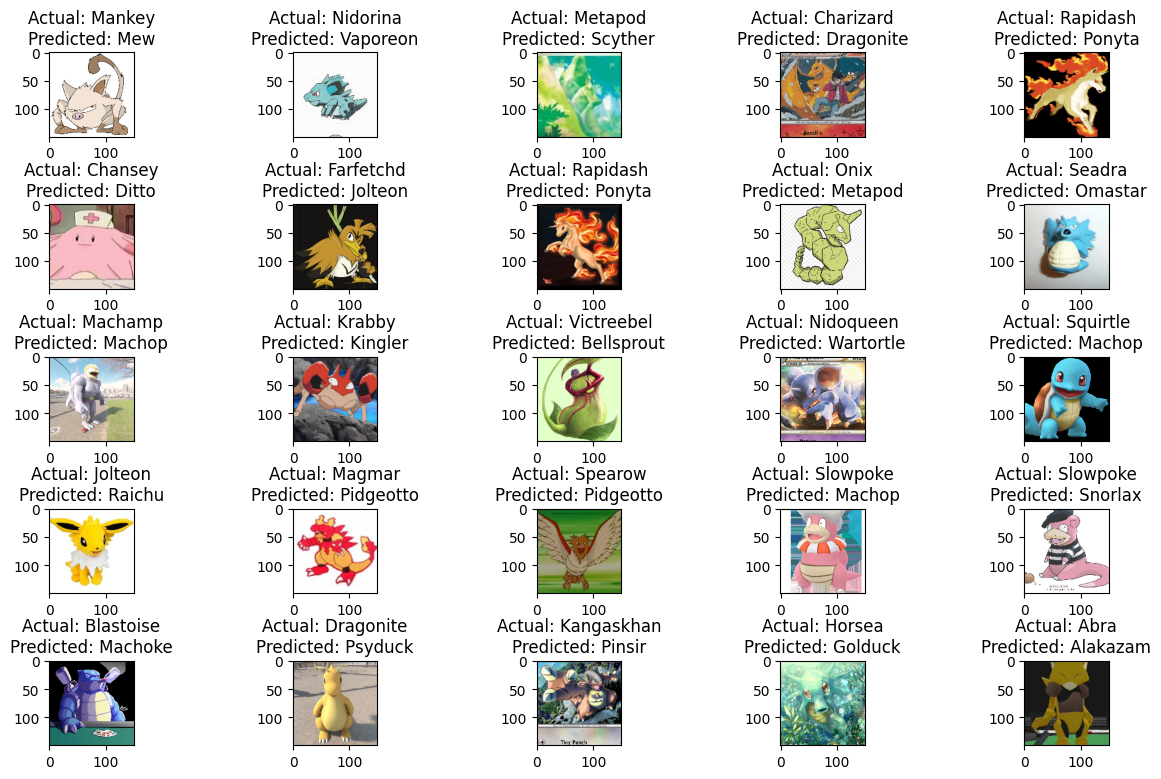

In [24]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] != y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')

# Pipelining the classification results to the Pokemon API

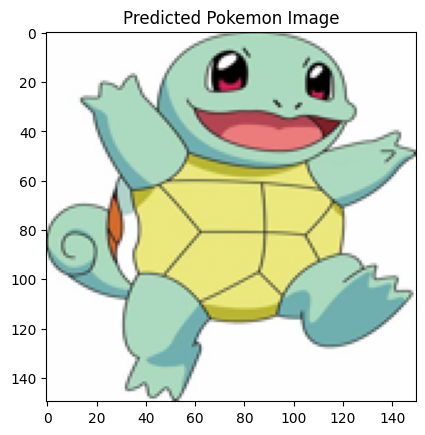

1/1 [==============================] - 0s 356ms/step
Name:  squirtle
Base Experience:  63
Height:  5 m
Weight:  90 kg



In [33]:
import cv2
import requests
# from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import urllib

# Function to predict Pokemon from an image URL
def predict_pokemon_from_url(img_url):
    # Using requests library to fetch the image content
    response = requests.get(img_url)

    # Checking if the request was successful (status code 200)
    if response.status_code == 200:
        # Using Image lib to resize image
        img = Image.open(BytesIO(response.content))
        img = img.resize((150, 150))

        # Dropping the transparency channel if it exists
        img_array = np.array(img)
        if img_array.shape[2] != 3:
            img_array = img_array[:, :, :3]

        # Converting to array, normalizing, and expanding the dimensions
        img_array = img_array / 255
        my_img_array = np.expand_dims(img_array, axis=0)

        # Displaying the image
        plt.imshow(img_array)
        plt.title("Predicted Pokemon Image")
        plt.show()


    else:
        print(f"Failed to fetch image from {img_url}. Status code: {response.status_code}")

# Example URLs
img_urls = ['https://th.bing.com/th/id/OIP.9L_lGQL-gjDf-qfm33eEdgHaJN?rs=1&pid=ImgDetMain']
pokemon_labels = []

# Predict Pokemon and fetch additional information for each URL
for img_url in img_urls:
    predict_pokemon_from_url(img_url)

    # Extracting the label from the model's prediction
    img = Image.open(BytesIO(requests.get(img_url).content))
    img = img.resize((150, 150))
    img = np.array(img)
    if img.shape[2] != 3:
        img = img[:, :, :3]
    img = img / 255
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    label = np.argmax(pred, axis=1)
    pokemon_labels.append(labels[label[0]].lower())

# Fetching additional information from the PokeAPI for each predicted Pokemon
for pokemon_label in pokemon_labels:
    url = f'https://pokeapi.co/api/v2/pokemon/{pokemon_label}'
    r = requests.get(url)

    print("Name: ", r.json()['name'])
    print("Base Experience: ", r.json()['base_experience'])
    print("Height: ", r.json()['height'], 'm')
    print("Weight: ", r.json()['weight'], 'kg')
    #print("Types: ", r.json()['types'])
    print()


In [26]:
# import tensorflow as tf

In [27]:
# model_path = '/content/drive/MyDrive/Pokemon_Classification_w1830176/Classification_model.h5'

In [28]:
# loaded_model = tf.keras.models.load_model(model_path)

In [29]:
# model_path = '/content/drive/MyDrive/Pokemon_Classification_w1830176/Classification_model.h5'


In [30]:
# from tensorflow.keras.models import load_model

# model = load_model(model_path)
